# Case Study - Health Care dataset

In this notebook, we'll explore the possibilties for data privacy on a new dataset.
Your challenge is that you are working with a health care provider, who would like to do the "machine learning" on this dataset to figure out if there are preventative measures that can be taken so fewer patients are seen in the hospital for related care or so that their visits are shorter, to do so you might want to predict the **has_diabetes** according to the features at hand. The goal is that more potentially affected patients are given access to primary care physicians and regular medication or visits that can keep them out of the hostpital for long stays.

## Part One: Determining What's Useful and What's Sensitive

- Data completeness
- Potential sensitive columns
- Potential useful features
- What columns should we use? 
- Which ones should we remove?
- Are there columns which we should protect but not remove? 

For each, we need some justification or thought!

In [66]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('health_data.csv')

In [67]:
df.head()

#look into our data
df.info()

# check correlationtins
corr = df.corr()
print("corrlation", corr)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   admitted_ts            1000 non-null   object
 1   age                    1000 non-null   int64 
 2   ambulance_call         1000 non-null   int64 
 3   blood_sugar_reading    1000 non-null   int64 
 4   days_since_last_visit  1000 non-null   int64 
 5   has_diabetes           1000 non-null   int64 
 6   hospital               1000 non-null   object
 7   hours_hospitalized     1000 non-null   int64 
 8   hydration_level        1000 non-null   int64 
 9   id                     1000 non-null   int64 
 10  insulin                1000 non-null   int64 
 11  marital_status         1000 non-null   object
 12  no_primary_dr          1000 non-null   bool  
 13  patient_name           1000 non-null   object
 14  private_insurance      1000 non-null   int64 
 15  released_sameday      

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


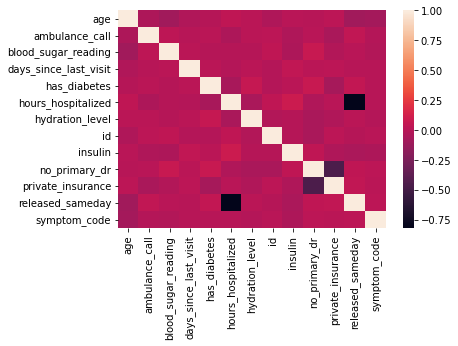

In [68]:
#Let'see look into the correlations
# the brighter the more correlations

!pip install seaborn
import seaborn as sns

sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

We can notice already some correlated fields with "released_sameday", hours_hospitalized, no_primary_dr, private_insurance, insuline, age, released the same day, blood sugar reading, has diabetes, hydratation level, that are  useful fields

The name of the patient must me removed

The sensitive data are
those that can provide indirectly information about the patient



In [6]:
# we can normalize the data for machine learning usage

## Part Two: Determining the Approach for Protecting the Columns

You are the database manager at the health care provider asked to prepare the data to send to a machine learning consultant who will help give you a more detailed analysis. The consultant has signed all the necessary NDAs, but you have instructions to keep the private or potentially sensitive data to a minimum.

Based on the scenario and what you learned

- What methods will be most effective? 
- Have you considered potential data leakage within the *non-sensitive* columns?
- Is there other sensitive or secret data we should address?

## Part Three: Implement Data Protection for the Dataset

Now it's time to code! Feel free to utilize code from the previous notebooks to implement protection of at least two of the columns you chose as sensitive. 

- What was difficult to decide and implement?
- How might this relate to real problems in machine learning with sensitive data? 



In [7]:
# it's diffcicult to chosse what  to protect. Amending the data with k-anonymous-closenes is not perfect and even with differential privacy may create some noise that will have an undetermined impact on learning quality.
# it's also difficult to deduce which non sensitive data would lead an attacker to find out about sensitive one 

## Bonus: machine learning from anonymized Dataset

Build a model that predicts the the diabetes statue of a new patient based on the anonymized database from part three. Compare with non anonymized dataset. (try to get more than 0.65 accuracy)

In [91]:
import numpy as np
#print(len(df))
dfTrain = df[:848]
dfTest = df[849:979]
dfCheck = df[949:]



testLabel = np.asarray(dfTest['has_diabetes'])
trainLabel = np.asarray(dfTrain['has_diabetes'])
trainData = dfTrain.drop(['has_diabetes','admitted_ts','hospital','marital_status','patient_name','ssn'], axis=1)
#.drop('admitted_ts')
testData = dfTest.drop(['has_diabetes','admitted_ts','hospital','marital_status','patient_name','ssn'], axis=1)


#trainData=np.asarray(trainData.drop('admitted_ts')
#testData =np.asarray(testData.drop('admitted_ts')
 

In [92]:
testData.head(5)

,age,ambulance_call,blood_sugar_reading,days_since_last_visit,hours_hospitalized,hydration_level,id,insulin,no_primary_dr,private_insurance,released_sameday,symptom_code
849,33,0,138,96,0,4,1849,0,True,0,1,3
850,16,0,112,27,13,4,1850,1,True,0,0,5
851,42,0,125,91,12,1,1851,0,False,1,0,2
852,53,1,93,29,8,9,1852,1,False,0,0,4
853,79,1,117,57,12,0,1853,1,True,0,0,9


In [95]:
#Testons un apprentissage par regression logisitique de notre modèle initial

import sklearn
from sklearn.linear_model import LogisticRegression
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)



accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.46153846153847 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
